### Objectives

To perform basic EDA on the datasets and apply the all clustering algorithms to identify the different clusters present in the data

#### Import library

In [1]:
# import basic libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
# Load Dataset and Columns
mc = pd.read_csv('Mall_Customers.csv')
print (mc.columns)
mc.head()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Descriptive Statistics

In [3]:
# Shape of Dataset
print("Shape of Mall Customers is: ",mc.shape)
print()
#information of Dataset
mc.info()
print()
#Description of Dataset
mc.describe()

Shape of Mall Customers is:  (200, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Missing Values identification and handling

In [4]:
#Looking out for missing values
mc.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Drop unused column
mc.drop(labels = 'CustomerID' , axis = 1 , inplace = True)

In [6]:
mc['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
# Replace values
mc['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

In [8]:
# Getting the information of dataset
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


#### Visulization

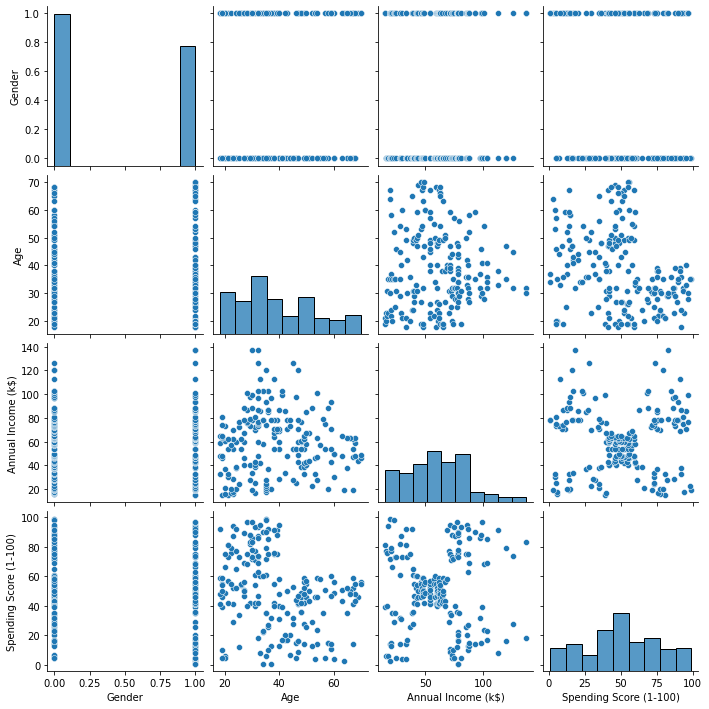

In [9]:
import seaborn as sns
sns.pairplot(mc)

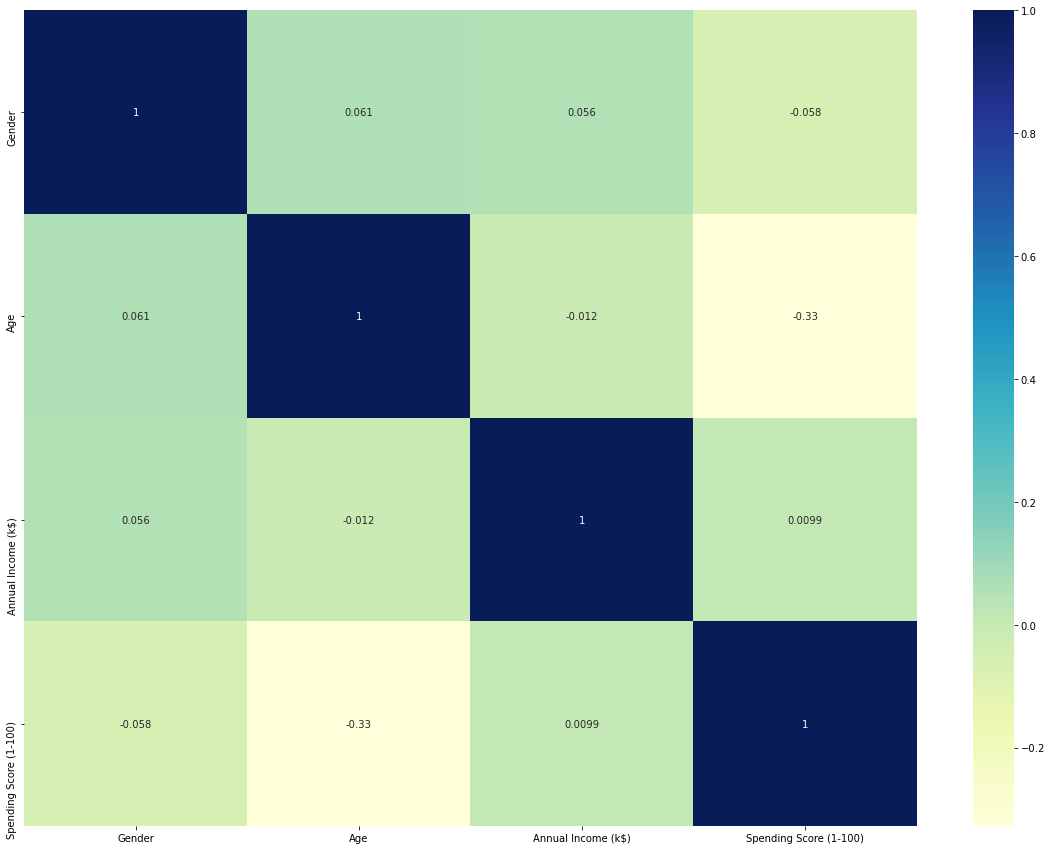

In [10]:
# show the best correlation through heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(mc.corr(), annot = True, cmap="YlGnBu")
plt.show()

The heatmap shows best correlation between Annual Income (k$) Spending Score (1-100)

In [11]:
# Getting Numerical Data
numerical = ['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']

In [12]:
for num in numerical:
    mc[num] = mc[num].fillna(mc[num].mode().values[0])
    mc.isnull().sum()

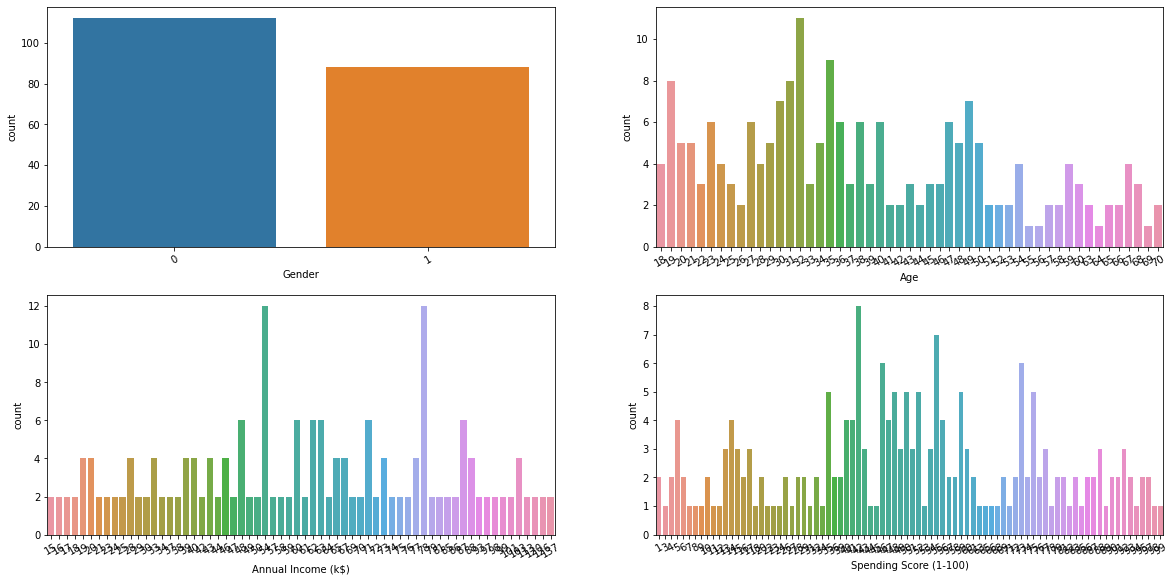

In [13]:
# Show Barplot to visualize 
fig = plt.figure(figsize = (20,15))
axes = 320
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = mc, x = num)
    plt.xticks(rotation=30)
plt.show()

In [14]:
# making the clusters of numerics columns
mc_cluster = pd.DataFrame()
mc_cluster['Gender'] = mc['Gender']
mc_cluster['Age'] = mc['Age']
mc_cluster['Annual Income (k$)'] = mc['Annual Income (k$)']
mc_cluster['Spending Score (1-100)'] = mc['Spending Score (1-100)']
mc_cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Plotting Box plots to find outliers - The box plot shows outliers in the numerical features

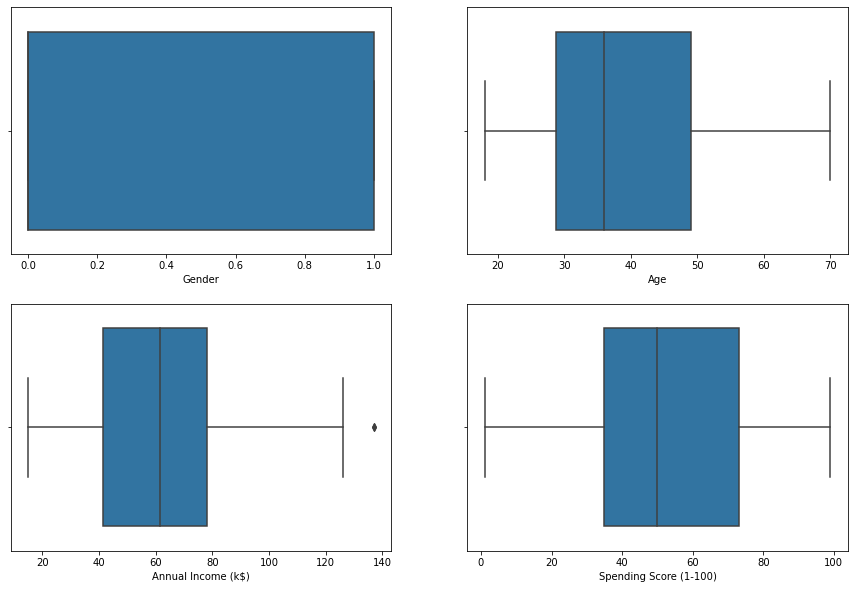

In [15]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = mc, x = num)
plt.show()

#### Positive Skewness
means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

No handles with labels found to put in legend.


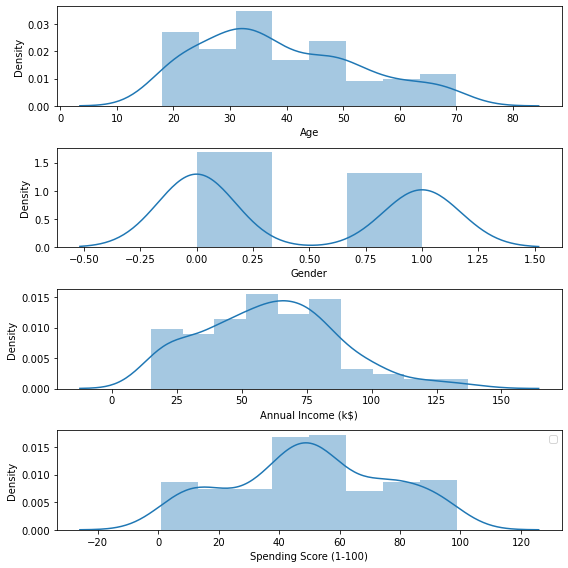

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(mc["Age"], ax=ax1)
sns.distplot(mc["Gender"], ax=ax2)
sns.distplot(mc["Annual Income (k$)"], ax=ax3)
sns.distplot(mc["Spending Score (1-100)"], ax=ax4)
plt.tight_layout()
plt.legend()

#### Log Transform
We can use logarithmic transformation to reduce the outliers and distribution skewness

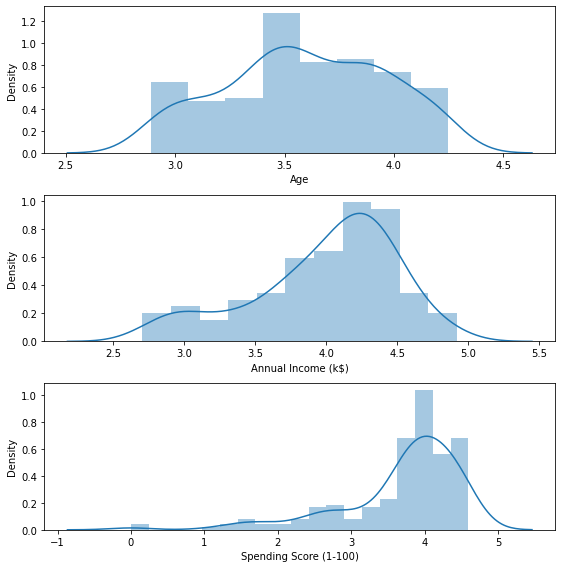

In [19]:
mc_cluster_log = np.log(mc_cluster[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(mc_cluster_log["Age"], ax=ax1)
sns.distplot(mc_cluster_log["Annual Income (k$)"], ax=ax2)
sns.distplot(mc_cluster_log["Spending Score (1-100)"], ax=ax3)
plt.tight_layout()

### Models

#### K Means Clustering

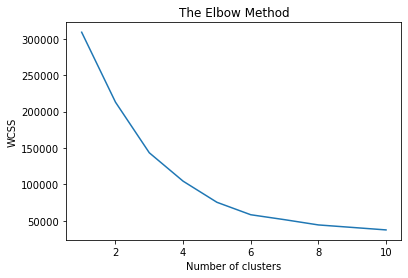

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(mc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Hierarchical Agglomerative Clustering

On this model, to determine the n_clusters we can use dendogram

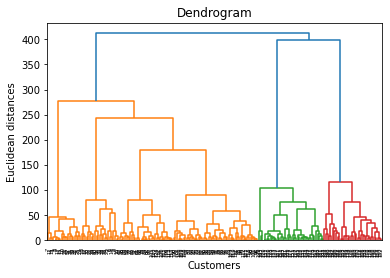

In [21]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(mc, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### Result Analysis
From these models, we can choose the most well segmented model, that is k-means. We use the clusters from the that model to analyze the dataset.